# OpenCV를 이용한 이미지 로드(cv2.imread)

### OpenCV 설치

* [OpenCV설치 가이드](https://www.pyimagesearch.com/2018/09/19/pip-install-opencv/)
* [argparse](https://www.pyimagesearch.com/2018/03/12/python-argparse-command-line-arguments/)

In [ ]:
!pip install opencv-contrib-python

In [1]:
import cv2

In [2]:
cv2.__version__

'4.1.2'

### 한글깨짐 처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,772 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and d

### 이미지 다운로드

In [3]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-load-image.zip
!unzip -qq opencv-load-image.zip  # 압축 해제

--2021-04-21 01:38:56--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-load-image.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.192.201
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.192.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1445183 (1.4M) [application/zip]
Saving to: ‘opencv-load-image.zip’

opencv-load-image.z 100%[===================>]   1.38M  2.83MB/s    in 0.5s    

2021-04-21 01:38:57 (2.83 MB/s) - ‘opencv-load-image.zip’ saved [1445183/1445183]



In [4]:
%cd opencv-load-image

/content/opencv-load-image


## 절차

### 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 패키지 임포트 

In [6]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import cv2

### 이미지 뷰를 위한 함수 생성

In [9]:
help(cv2.cvtColor)

Help on built-in function cvtColor:

cvtColor(...)
    cvtColor(src, code[, dst[, dstCn]]) -> dst
    .   @brief Converts an image from one color space to another.
    .   
    .   The function converts an input image from one color space to another. In case of a transformation
    .   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
    .   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
    .   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
    .   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
    .   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
    .   
    .   The conventional ranges for R, G, and B channel values are:
    .   -   0 to 255 for CV_8U images
    .   -   0 to 65535 for CV_16U images
    .   -   0 to 1 for CV_32F images
    .   
    .

In [15]:
def plt_imshow(title, image):
  '''
  이미지 프레임을 BGR에서 RGB컬러로 변환
  convert the image frame BGR to RGB color space and display it
  '''
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(True)
  plt.show() 

### OpenCV을 이용한 이미지 로드 및 저장 스크립트 구현

In [13]:
# 콘솔에서 python xxxx.py a.png 이런 식으로 수행가능
# 코랩환경에서 돌리므로 아래 부분은 주석 처리 

#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "30th_birthday.png",
}

In [17]:
# cv2.imread()를 이용해 로컬 디스크에서 이미지 로드 
# dimensions, including width, height, and number of channels
# image = cv2.imread("path/to/image.png")
image = cv2.imread(args['image'])
# numpy.ndarray
# (764, 720, 3) - 높이, 너비, 채널
display(type(image), image.shape)  

h, w, c = image.shape[:3]  
display(h, w, c)

print("Image width : {} pixels".format(h))
print("Image height : {} pixels".format(w))
print("Image channel : {} ".format(c))

numpy.ndarray

(764, 720, 3)

764

720

3

Image width : 764 pixels
Image height : 720 pixels
Image channel : 3 


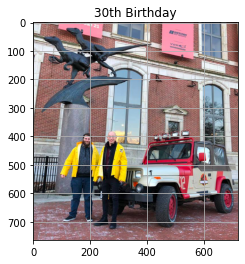

True

In [22]:
# 메모리에 불러들인 이미지 보여주기 
plt_imshow("30th Birthday", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("newImage.jpg", image,)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_

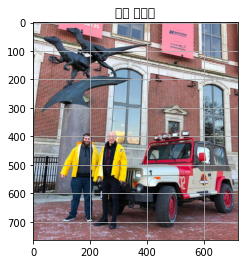

In [24]:
# 저장한 이미지 불러오기
args = {'image':"new_image.jpg"}
newImg = cv2.imread(args['image'])
plt_imshow("저장 이미지", newImg)

array([[[  0,   4,   1],
        [  0,   2,   0],
        [  0,   3,   0],
        ...,
        [ 23,  90,  59],
        [  7,  83,  51],
        [  1,  87,  53]],

       [[  0,   6,   3],
        [  0,   6,   0],
        [  0,   7,   1],
        ...,
        [ 20,  87,  56],
        [  6,  82,  50],
        [  0,  83,  49]],

       [[  2,   9,   4],
        [  3,  10,   5],
        [  2,  12,   6],
        ...,
        [  9,  79,  48],
        [ 14,  93,  60],
        [ 13,  99,  65]],

       ...,

       [[ 12,   9,   5],
        [  4,   3,   0],
        [  5,   6,   2],
        ...,
        [131, 135, 130],
        [137, 141, 135],
        [130, 134, 129]],

       [[  4,   5,   3],
        [  4,   5,   3],
        [  2,   5,   3],
        ...,
        [140, 141, 139],
        [140, 141, 137],
        [140, 141, 139]],

       [[  2,   5,   3],
        [  2,   5,   3],
        [  2,   5,   3],
        ...,
        [140, 141, 139],
        [140, 141, 139],
        [140, 141, 139]]

numpy.ndarray

(418, 743, 3)

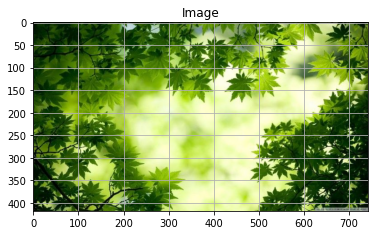

In [27]:
 # 저장한 이미지를 불러오기
 imgDir = "/content/opencv-load-image/autumn leaves.jpg"
img = cv2.imread(imgDir)

display(img, type(img), img.shape)
plt_imshow("Image", img)

### 다른 이미지 테스트

In [28]:
args = {
    'image':'jurassic_park.png'
}

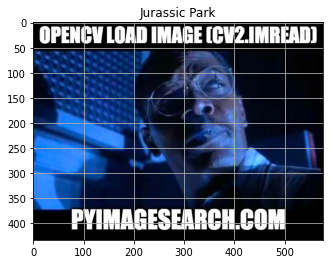

433

577

3

In [32]:
img = cv2.imread(args['image'])
plt_imshow("Jurassic Park", img)

height, width, channel = img.shape[:3]
display(height, width, channel)

In [35]:
# copy image and save
if cv2.imwrite("copy_jurrasic.png", img):
  print("새로운 이미지로 저장")
else:
  pass

새로운 이미지로 저장


In [38]:
img = cv2.imread("/content/opencv-load-image/copy_jurrasic.png")
display(img, img.shape, type(img))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

(433, 577, 3)

numpy.ndarray